In [22]:
import pandas as pd
import numpy as np

In [23]:
practice0 = pd.DataFrame({"이름": ["홍길동", "김길동"], "나이":[100, 200]})
practice0

,이름,나이
0,홍길동,100
1,김길동,200


In [24]:
practice = pd.DataFrame({"날짜":[], "운동":[], "양":[]})
practice

,날짜,운동,양


In [25]:
# loc[행인덱스] => 행인덱스에 한 행을 추가해라
practice.loc[0] = ["19-3-1", "달리기", 1.] # loc row[0]번째 행 넣기
practice

,날짜,운동,양
0,19-3-1,달리기,1.0


In [26]:
practice.loc[1] = ["19-3-2", "걷기", 1.]
practice.loc[2] = ["19-3-2", "달리기", 1.]
practice.loc[3] = ["19-3-2", "계단오르기", 1.]
practice

,날짜,운동,양
0,19-3-1,달리기,1.0
1,19-3-2,걷기,1.0
2,19-3-2,달리기,1.0
3,19-3-2,계단오르기,1.0


In [27]:
practice.loc[4] = ["19-3-3", "걷기", 1.5]
practice.loc[5] = ["19-3-3", "달리기", 1.]
practice

,날짜,운동,양
0,19-3-1,달리기,1.0
1,19-3-2,걷기,1.0
2,19-3-2,달리기,1.0
3,19-3-2,계단오르기,1.0
4,19-3-3,걷기,1.5
5,19-3-3,달리기,1.0


In [38]:
practice.to_csv("../../Downloads/practice2.csv", encoding="utf-8") # 파일을 저장하기 위해서는 to_csv 사용해서 저장할 수 있다.
# 경로 지정을 잘 해줘야한다.

In [28]:
practice2 = pd.read_csv("../../Downloads/practice.csv", index_col=0, encoding="utf-8")
practice2

,날짜,운동,양
0,19-3-1,달리기,1.0
1,19-3-2,걷기,1.0
2,19-3-2,달리기,1.0
3,19-3-2,계단오르기,1.0
4,19-3-3,걷기,1.5
5,19-3-3,달리기,1.0


In [29]:
practice2.loc[6] = ["19-3-4", "걷기", 1.5]
practice2.loc[7] = ["19-3-5", "달리기", 1.]
practice2.loc[8] = ["19-3-6", "걷기", 2.5]
practice2.loc[9] = ["19-3-6", "달리기", 0.5]
practice2

,날짜,운동,양
0,19-3-1,달리기,1.0
1,19-3-2,걷기,1.0
2,19-3-2,달리기,1.0
3,19-3-2,계단오르기,1.0
4,19-3-3,걷기,1.5
5,19-3-3,달리기,1.0
6,19-3-4,걷기,1.5
7,19-3-5,달리기,1.0
8,19-3-6,걷기,2.5
9,19-3-6,달리기,0.5


In [30]:
practice2.pivot_table(index="운동") # avg 평균으로 구해준다.

,양
운동,
걷기,1.625
계단오르기,1.000
달리기,0.900


In [31]:
practice2.pivot_table(index="운동", aggfunc=np.sum) # 합계를 구하기 위해서는 aggfunc기능과 numpy 기능을 사용

,양
운동,
걷기,6.5
계단오르기,1.0
달리기,4.5


In [32]:
practice2.pivot_table(index="운동", aggfunc=[np.sum, len]) # 여러개를 묶을때는 리스트나 튜플로 묶어준다.

sum len     
         양  날짜    양
운동                 
걷기     6.5   4  4.0
계단오르기  1.0   1  1.0
달리기    4.5   5  5.0

In [36]:
practice2.pivot_table(index="운동", aggfunc=[np.sum, np.average, len]) # len은 갯수이다. 예)걷기는 4개

sum average len     
         양       양  날짜    양
운동                         
걷기     6.5   1.625   4  4.0
계단오르기  1.0   1.000   1  1.0
달리기    4.5   0.900   5  5.0

In [39]:
prac_pivot = practice2.pivot("날짜", "운동", "양")
#                           인덱스(행), 종류(열), 테이블 가운데 채워지는 값(양)
# 각각의 위치가 어디인지 확인 꼭 필요!
prac_pivot

운동,걷기,계단오르기,달리기
날짜,,,
19-3-1,NaN,NaN,1.0
19-3-2,1.0,1.0,1.0
19-3-3,1.5,NaN,1.0
19-3-4,1.5,NaN,NaN
19-3-5,NaN,NaN,1.0
19-3-6,2.5,NaN,0.5


In [40]:
# NaN: 행과 열에 적합한 값이 없다 -> 삭제, 수치로 변환.
# 수치변환: 평균, 0, 내가 원하는 특정한 기본값으로 변환(상황에 따라서 맞는 방법을 사용한다.)

In [41]:
prac_pivot.fillna(0, inplace=True) # fillna -> NaN 이라는 값을 대체하는 함수!
# fillna는 비파괴함수라서 파괴함수로 옵션을 줘야한다. inplace 옵션이 비파괴함수 -> 파괴함수로 변경하는 옵션
prac_pivot

운동,걷기,계단오르기,달리기
날짜,,,
19-3-1,0.0,0.0,1.0
19-3-2,1.0,1.0,1.0
19-3-3,1.5,0.0,1.0
19-3-4,1.5,0.0,0.0
19-3-5,0.0,0.0,1.0
19-3-6,2.5,0.0,0.5


In [42]:
not_excercise = pd.read_excel("../../Downloads/reason_not_exercise.xls") # 경로 지정 중요!
not_excercise

,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
0,2017,서울시,서울시,49.7,8.1,5.8,34.7,1.7
1,2017,성별,남자,55.2,7.9,5.5,29.8,1.6
2,2017,성별,여자,45.0,8.3,6.0,38.8,1.8
3,2017,연령별,10대,55.7,6.1,5.6,32.2,0.3
4,2017,연령별,20대,54.8,6.9,5.2,32.9,0.1
5,2017,연령별,30대,58.1,5.5,4.6,31.6,0.2
6,2017,연령별,40대,57.7,6.8,5.2,29.4,1
7,2017,연령별,50대,50.1,9.2,7.2,32.2,1.4
8,2017,연령별,60대 이상,27.5,12.8,6.9,46.8,6
9,2017,학력별,중졸 이하,26.1,13.7,6.6,46.2,7.4


In [43]:
not_excercise.drop(columns="기간", inplace=True) # drop도 비파괴함수이기 때문에 inplace 사용
not_excercise

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
0,서울시,서울시,49.7,8.1,5.8,34.7,1.7
1,성별,남자,55.2,7.9,5.5,29.8,1.6
2,성별,여자,45.0,8.3,6.0,38.8,1.8
3,연령별,10대,55.7,6.1,5.6,32.2,0.3
4,연령별,20대,54.8,6.9,5.2,32.9,0.1
5,연령별,30대,58.1,5.5,4.6,31.6,0.2
6,연령별,40대,57.7,6.8,5.2,29.4,1
7,연령별,50대,50.1,9.2,7.2,32.2,1.4
8,연령별,60대 이상,27.5,12.8,6.9,46.8,6
9,학력별,중졸 이하,26.1,13.7,6.6,46.2,7.4


In [44]:
not_excercise.drop(index=range(22, 53), inplace=True) # index 범위를 줘서 삭제해줄 수 있다.
not_excercise

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
0,서울시,서울시,49.7,8.1,5.8,34.7,1.7
1,성별,남자,55.2,7.9,5.5,29.8,1.6
2,성별,여자,45.0,8.3,6.0,38.8,1.8
3,연령별,10대,55.7,6.1,5.6,32.2,0.3
4,연령별,20대,54.8,6.9,5.2,32.9,0.1
5,연령별,30대,58.1,5.5,4.6,31.6,0.2
6,연령별,40대,57.7,6.8,5.2,29.4,1
7,연령별,50대,50.1,9.2,7.2,32.2,1.4
8,연령별,60대 이상,27.5,12.8,6.9,46.8,6
9,학력별,중졸 이하,26.1,13.7,6.6,46.2,7.4


In [45]:
not_excercise.shape # shape 는 행렬의 크기를 볼 수 있는 함수

(22, 7)

In [46]:
not_excercise["대분류"] # 대분류에 있는 항목명만 쭉 출력!

0       서울시
1        성별
2        성별
3       연령별
4       연령별
5       연령별
6       연령별
7       연령별
8       연령별
9       학력별
10      학력별
11      학력별
12      학력별
13      소득별
14      소득별
15      소득별
16      소득별
17      소득별
18      소득별
19    혼인상태별
20    혼인상태별
21    혼인상태별
Name: 대분류, dtype: object

In [47]:
not_excercise["운동을 할 충분한 시간이 없어서"] # 컬럼명을 지정해서 해당 값을 다 출력도 가능

0     49.7
1     55.2
2     45.0
3     55.7
4     54.8
5     58.1
6     57.7
7     50.1
8     27.5
9     26.1
10    46.3
11    57.4
12    65.3
13    22.7
14    34.3
15    48.8
16    54.9
17    56.1
18    52.3
19    50.7
20    54.3
21    47.4
Name: 운동을 할 충분한 시간이 없어서, dtype: float64

In [48]:
not_excercise["대분류"] == "성별" # 대분류가 성별이랑 같으면 True, 다르면 False
# 브로드캐스팅 내가 준 조건을 모든 값과 비교해서 출력하는 방식

0     False
1      True
2      True
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
Name: 대분류, dtype: bool

In [49]:
# not_excercise[] # [] 는 조건을 넣기 위한 역할

In [50]:
not_excercise[not_excercise["대분류"] == "성별"] # 조건을 안으로 주면 해당 조건값만 추출가능

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
1,성별,남자,55.2,7.9,5.5,29.8,1.6
2,성별,여자,45.0,8.3,6.0,38.8,1.8


In [51]:
not_ex_sex = not_excercise[not_excercise["대분류"] == "성별"].copy()
not_ex_sex

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
1,성별,남자,55.2,7.9,5.5,29.8,1.6
2,성별,여자,45.0,8.3,6.0,38.8,1.8


In [52]:
not_ex_sex.drop(columns="대분류", inplace=True) # 필요없는 대분류 삭제해서 필요한 값만 보기
not_ex_sex

,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
1,남자,55.2,7.9,5.5,29.8,1.6
2,여자,45.0,8.3,6.0,38.8,1.8


In [53]:
not_ex_sex.set_index("분류", inplace=True) # 기본인덱스를 분류로 변경해준다.
not_ex_sex

,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
분류,,,,,
남자,55.2,7.9,5.5,29.8,1.6
여자,45.0,8.3,6.0,38.8,1.8


In [54]:
import matplotlib.pyplot as plt # 시각화를 위한 import -> matplotlip.pyplot 를 임포트 해야한다.

In [55]:
from matplotlib import font_manager, rc # 한글을 처리하기 위한 import

In [56]:
f_path = "C:/Windows/Fonts/malgunbd.ttf" # 글꼴 지정하기!
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc("font", family = font_name) # 한글 폰트 지정하기!

In [57]:
plt.rcParams["axes.unicode_minus"] = False # 깨지는 축 수정해 놓기

In [58]:
def call():
    return 100, 200 # 파이썬은 리턴을 그냥 여러개 찍어서 보낼 수 있다.(튜플로 리턴된다)
print(call())

(100, 200)


In [59]:
x, y = call() # 리턴값을 바로 변수에 순서대로 넣어줄 수 있다.
print(x, y)

100 200


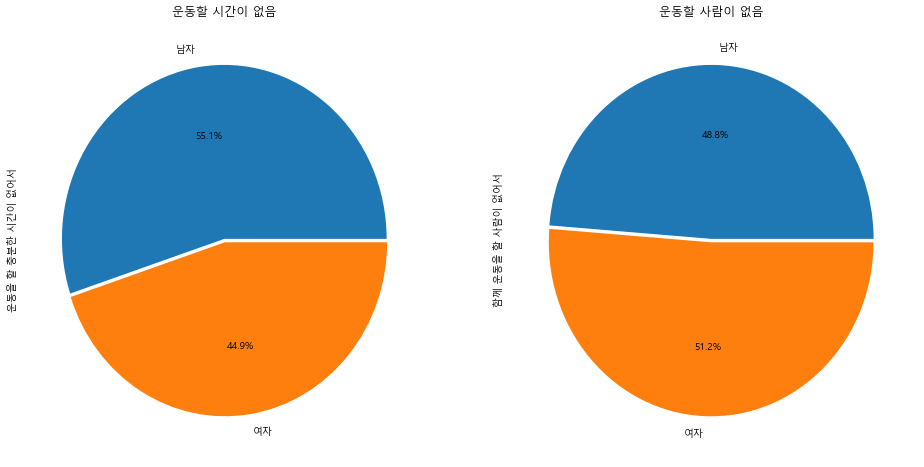

In [66]:
f, ax = plt.subplots(1, 2, figsize = (16, 8))
# 여러줄의 그래프를 만들때 사용하는 함수 subplots 1개의 행에 2개를 만들꺼다
# 사이즈 조절은 figsize로 가능
not_ex_sex["운동을 할 충분한 시간이 없어서"].plot.pie(explode=[0, 0.02], ax=ax[0], autopct="%1.1f%%")
not_ex_sex["함께 운동을 할 사람이 없어서"].plot.pie(explode=[0, 0.02], ax=ax[1], autopct="%1.1f%%")
ax[0].set_title("운동할 시간이 없음")
ax[1].set_title("운동할 사람이 없음")
plt.show()

In [63]:
# 왼쪽이 ax0, 오른쪽이 ax1이 된다.

In [109]:
not_excercise[not_excercise["대분류"] == "연령별"] # 조건을 안으로 주면 해당 조건값만 추출가능

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
3,연령별,10대,55.7,6.1,5.6,32.2,0.3
4,연령별,20대,54.8,6.9,5.2,32.9,0.1
5,연령별,30대,58.1,5.5,4.6,31.6,0.2
6,연령별,40대,57.7,6.8,5.2,29.4,1
7,연령별,50대,50.1,9.2,7.2,32.2,1.4
8,연령별,60대 이상,27.5,12.8,6.9,46.8,6


In [110]:
not_ex_age = not_excercise[not_excercise["대분류"] == "연령별"].copy() # 깊은 복사를 위한 copy()
not_ex_age

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
3,연령별,10대,55.7,6.1,5.6,32.2,0.3
4,연령별,20대,54.8,6.9,5.2,32.9,0.1
5,연령별,30대,58.1,5.5,4.6,31.6,0.2
6,연령별,40대,57.7,6.8,5.2,29.4,1
7,연령별,50대,50.1,9.2,7.2,32.2,1.4
8,연령별,60대 이상,27.5,12.8,6.9,46.8,6


In [111]:
not_ex_age.drop(columns="대분류", inplace=True) # 필요없는 대분류 drop
not_ex_age

,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
3,10대,55.7,6.1,5.6,32.2,0.3
4,20대,54.8,6.9,5.2,32.9,0.1
5,30대,58.1,5.5,4.6,31.6,0.2
6,40대,57.7,6.8,5.2,29.4,1
7,50대,50.1,9.2,7.2,32.2,1.4
8,60대 이상,27.5,12.8,6.9,46.8,6


In [112]:
not_ex_age.set_index("분류", inplace=True) # 인덱스를 분류로 설정!
not_ex_age

,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
분류,,,,,
10대,55.7,6.1,5.6,32.2,0.3
20대,54.8,6.9,5.2,32.9,0.1
30대,58.1,5.5,4.6,31.6,0.2
40대,57.7,6.8,5.2,29.4,1
50대,50.1,9.2,7.2,32.2,1.4
60대 이상,27.5,12.8,6.9,46.8,6


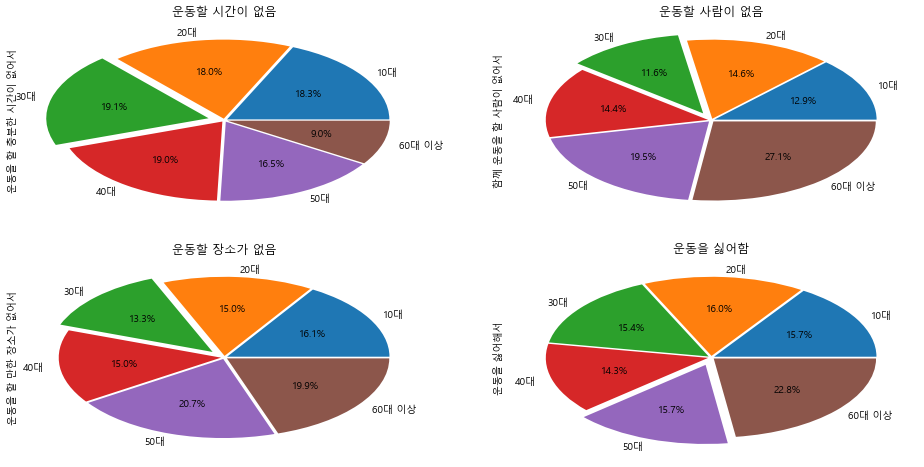

In [121]:
f2, ax2 = plt.subplots(2, 2, figsize = (16, 8)) # subplots를 사용해서 한번에 2개의 그래프를 그릴 수 있다.
# 사이즈도 조정 가능 subplots(줄갯수, 그래프 갯수, figsize = (전체 그래프 추출되는 영역의 크기))
not_ex_age["운동을 할 충분한 시간이 없어서"].plot.pie(explode=[0.02, 0.02, 0.1, 0.02, 0.02, 0.02], ax=ax2[0][0], autopct="%1.1f%%")
not_ex_age["함께 운동을 할 사람이 없어서"].plot.pie(explode=[0.02, 0.02, 0.1, 0.02, 0.02, 0.02], ax=ax2[0][1], autopct="%1.1f%%")
not_ex_age["운동을 할 만한 장소가 없어서"].plot.pie(explode=[0.02, 0.02, 0.1, 0.02, 0.02, 0.02], ax=ax2[1][0], autopct="%1.1f%%")
not_ex_age["운동을 싫어해서"].plot.pie(explode=[0.02, 0.02, 0.02, 0.02, 0.1, 0.02], ax=ax2[1][1], autopct="%1.1f%%")
# explode는 각각의 영역의 간격? 
ax2[0][0].set_title("운동할 시간이 없음")
ax2[0][1].set_title("운동할 사람이 없음")
ax2[1][0].set_title("운동할 장소가 없음")
ax2[1][1].set_title("운동을 싫어함")
plt.show()